In [1]:
import json
from sqlalchemy import create_engine
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
engine = create_engine('sqlite:///tab.db')
conn = engine.connect()
dfo = pd.read_sql_table('race', conn)
dfo.head()

,id,meeting_name,location,venue_mnemonic,race_type,meeting_date,race_number,race_name,race_start_time,race_status,race_distance,results_data,num_runners,runners_data
0,1,RICHMOND,NSW,C,G,2017-09-13,1,LADBROKES INFO HUB MDN HT1,2017-09-13 05:12:00,Paying,400,"[[4], [2], [1], [5]]",8,"[{""runnerName"": ""ZALI'S BLUEBOY"", ""runnerNumbe..."
1,2,RICHMOND,NSW,C,G,2017-09-13,2,KEVIN WATERS TOWING MDN HT2,2017-09-13 05:32:00,Paying,400,"[[1], [8], [7], [2]]",8,"[{""runnerName"": ""SKETCHY LINDA"", ""runnerNumber..."
2,3,RICHMOND,NSW,C,G,2017-09-13,4,PENRITHELECTRICAL.COM.AU STKS,2017-09-13 06:07:00,Paying,400,"[[9], [7], [8], [2]]",8,"[{""runnerName"": ""BROWZA BOB'"", ""runnerNumber"":..."
3,4,RICHMOND,NSW,C,G,2017-09-13,5,RICHMONDGREYHOUNDS.COM.AU STKS,2017-09-13 06:27:00,Paying,618,"[[6], [7], [3], [1]]",8,"[{""runnerName"": ""MIAMI DEMON"", ""runnerNumber"":..."
4,5,RICHMOND,NSW,C,G,2017-09-13,6,SWIFT FANCY @ STUD 1-2W STKS,2017-09-13 06:42:00,Paying,535,"[[6], [7], [1], [8]]",8,"[{""runnerName"": ""KILLING TIME"", ""runnerNumber""..."


In [3]:
dfo['results'] = dfo['results_data'].map(json.loads)
dfo['runners'] = dfo['runners_data'].map(json.loads)
dfo.head()

,id,meeting_name,location,venue_mnemonic,race_type,meeting_date,race_number,race_name,race_start_time,race_status,race_distance,results_data,num_runners,runners_data,results,runners
0,1,RICHMOND,NSW,C,G,2017-09-13,1,LADBROKES INFO HUB MDN HT1,2017-09-13 05:12:00,Paying,400,"[[4], [2], [1], [5]]",8,"[{""runnerName"": ""ZALI'S BLUEBOY"", ""runnerNumbe...","[[4], [2], [1], [5]]","[{'runnerName': 'ZALI'S BLUEBOY', 'runnerNumbe..."
1,2,RICHMOND,NSW,C,G,2017-09-13,2,KEVIN WATERS TOWING MDN HT2,2017-09-13 05:32:00,Paying,400,"[[1], [8], [7], [2]]",8,"[{""runnerName"": ""SKETCHY LINDA"", ""runnerNumber...","[[1], [8], [7], [2]]","[{'runnerName': 'SKETCHY LINDA', 'runnerNumber..."
2,3,RICHMOND,NSW,C,G,2017-09-13,4,PENRITHELECTRICAL.COM.AU STKS,2017-09-13 06:07:00,Paying,400,"[[9], [7], [8], [2]]",8,"[{""runnerName"": ""BROWZA BOB'"", ""runnerNumber"":...","[[9], [7], [8], [2]]","[{'runnerName': 'BROWZA BOB'', 'runnerNumber':..."
3,4,RICHMOND,NSW,C,G,2017-09-13,5,RICHMONDGREYHOUNDS.COM.AU STKS,2017-09-13 06:27:00,Paying,618,"[[6], [7], [3], [1]]",8,"[{""runnerName"": ""MIAMI DEMON"", ""runnerNumber"":...","[[6], [7], [3], [1]]","[{'runnerName': 'MIAMI DEMON', 'runnerNumber':..."
4,5,RICHMOND,NSW,C,G,2017-09-13,6,SWIFT FANCY @ STUD 1-2W STKS,2017-09-13 06:42:00,Paying,535,"[[6], [7], [1], [8]]",8,"[{""runnerName"": ""KILLING TIME"", ""runnerNumber""...","[[6], [7], [1], [8]]","[{'runnerName': 'KILLING TIME', 'runnerNumber'..."


In [4]:
data = pd.DataFrame()
for row in dfo['runners']:
    data = data.append(row)
data.head()

,barrierNumber,claimAmount,finishingPosition,fixedOdds,odds_best,odds_perc,odds_scaled,parimutuel,prediction,probability,riderDriverName,runnerName,runnerNumber,trainerName
0,1,0.0,3,"{'returnWin': 6, 'returnWinOpen': 6, 'returnPl...",6.0,0.166667,0.140341,"{'bettingStatus': 'Normal', 'returnWin': 5.1, ...",2.509228e-01,1.313093e-01,,ZALI'S BLUEBOY,1,BRAD PEARCE
1,2,0.0,2,"{'returnWin': 2.8, 'returnWinOpen': 3.4, 'retu...",2.8,0.357143,0.300730,"{'bettingStatus': 'Normal', 'returnWin': 2.7, ...",6.210967e-01,3.250234e-01,,OVER WATCH,2,MATHEW EGGE
2,3,0.0,0,"{'returnWin': 21, 'returnWinOpen': 15, 'return...",21.0,0.047619,0.040097,"{'bettingStatus': 'Normal', 'returnWin': 28.5,...",3.543074e-02,1.854111e-02,,STATION GIRL,3,DANIEL MCDONALD
3,4,0.0,1,"{'returnWin': 34, 'returnWinOpen': 19, 'return...",34.0,0.029412,0.024766,"{'bettingStatus': 'Normal', 'returnWin': 16.7,...",1.055459e-26,5.523279e-27,,SANYA BAY,4,PAUL BOYD
4,5,0.0,4,"{'returnWin': 19, 'returnWinOpen': 13, 'return...",19.0,0.052632,0.044318,"{'bettingStatus': 'Normal', 'returnWin': 17.5,...",3.640473e-02,1.905080e-02,,FIRE IMAGE,5,PERCY GORDON


In [13]:
# drop 0 odds losers
data = data[(data.odds_win > 0)]
data.describe()

AttributeError: 'DataFrame' object has no attribute 'odds_win'

In [5]:
# set losers with 0 to 5
data.loc[data['finishingPosition'] == 0, 'finishingPosition'] = 5

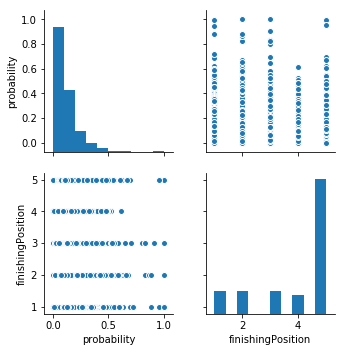

In [6]:
sns.pairplot(data, vars=['probability', 'finishingPosition'])

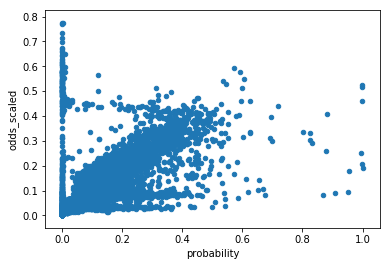

In [7]:
data.plot.scatter(x='probability', y='odds_scaled')

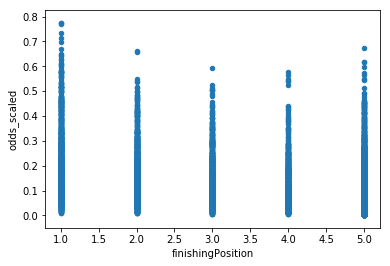

In [8]:
data.plot.scatter(x='finishingPosition', y='odds_scaled')

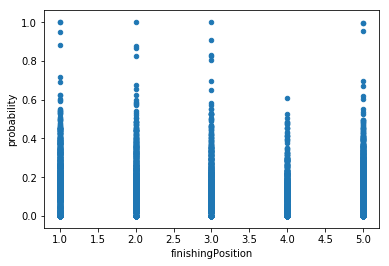

In [9]:
data.plot.scatter(x='finishingPosition', y='probability')

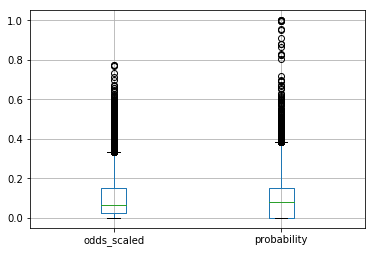

In [10]:
data.boxplot(column=['odds_scaled', 'probability'])

In [11]:
df_high = data[(data.probability > 0.8)]
df_high

,barrierNumber,claimAmount,finishingPosition,fixedOdds,odds_best,odds_perc,odds_scaled,parimutuel,prediction,probability,riderDriverName,runnerName,runnerNumber,trainerName
2,2,-1.0,5,"{'returnWin': 4.2, 'returnWinOpen': 3.4, 'retu...",4.2,0.238095,0.205978,"{'bettingStatus': 'Normal', 'returnWin': 4.1, ...",3.210260e-02,0.997691,BLAKE SHINN,MARISHKA,3,PETER & PAUL SNOWDEN
3,0,0.0,3,"{'returnWin': 2.5, 'returnWinOpen': 1.6, 'retu...",2.5,0.400000,0.335943,"{'bettingStatus': 'Normal', 'returnWin': 2.4, ...",3.903543e-01,0.802845,DAVID MORAN,LOCHINVAR DELIGHT,2,L E CROSSLAND
3,2,-1.0,1,"{'returnWin': 1.6, 'returnWinOpen': 1.55, 'ret...",1.6,0.625000,0.517367,"{'bettingStatus': 'Normal', 'returnWin': 1.7, ...",8.632737e-11,0.998699,R WALSH,FABULOUS SAGA,2,W P MULLINS
1,4,0.0,3,"{'returnWin': 2.9, 'returnWinOpen': 2.3, 'retu...",2.9,0.344828,0.289618,"{'bettingStatus': 'Normal', 'returnWin': 2.9, ...",4.151302e-01,0.831770,,WEST ON CHARLIE,4,CHRIS HALSE
3,4,2.0,3,"{'returnWin': 8, 'returnWinOpen': 12, 'returnP...",8.0,0.125000,0.090718,"{'bettingStatus': 'Normal', 'returnWin': 6.7, ...",6.105575e-01,0.909887,LACHLAN KING,HERO MASTER,6,PETER SMITH
2,3,0.0,2,"{'returnWin': 2.5, 'returnWinOpen': 2.4, 'retu...",3.0,0.400000,0.332000,"{'bettingStatus': 'Normal', 'returnWin': 3, 'r...",5.607937e-01,0.824044,,BLACK MUMBO,3,ANTHONY KARABITSAKOS
2,3,2.5,2,"{'returnWin': 4.6, 'returnWinOpen': 4, 'return...",4.8,0.217391,0.191731,"{'bettingStatus': 'Normal', 'returnWin': 4.8, ...",3.135218e-02,1.000000,L A HOURIGAN,ASK SUSAN,4,JOHN W NICHOLSON
0,4,-1.0,5,"{'returnWin': 3.3, 'returnWinOpen': 3.3, 'retu...",3.3,0.303030,0.250332,"{'bettingStatus': 'Normal', 'returnWin': 3, 'r...",1.883353e-01,0.994187,R L MOORE,DARK RED,1,E A L DUNLOP
1,8,0.0,3,"{'returnWin': 2.7, 'returnWinOpen': 2.6, 'retu...",2.7,0.370370,0.303141,"{'bettingStatus': 'Normal', 'returnWin': 2.3, ...",6.549798e-01,0.824870,,CHOP SHOP,8,J T MCINERNEY
0,2,-1.0,5,"{'returnWin': 5, 'returnWinOpen': 3.9, 'return...",5.0,0.200000,0.178712,"{'bettingStatus': 'Normal', 'returnWin': 4.9, ...",1.007264e-01,0.954793,P HANAGAN,FANAN,1,SIMON CRISFORD
